# Imports

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image
from matplotlib.pyplot import imshow, imsave
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import datetime
import os, sys
import time
import pandas as pd

from matplotlib.pyplot import imshow, imsave
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline
import shutil

from google.colab import drive
import os

# gdrive_path='/content/gdrive/MyDrive/Capstone thesis Anahit/GANS - implementations/GANs/collect_into_one_architecture/'
gdrive_path='/content/gdrive/MyDrive/GANs/collect_into_one_architecture'

drive.mount('/content/gdrive', force_remount=True)
os.chdir(gdrive_path)
print(sorted(os.listdir()))


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Mounted at /content/gdrive
['Changing_betas.ipynb', 'Changing_clip_values.ipynb', 'Changing_disc_iter.ipynb', 'Changing_gradient_penalty.ipynb', 'Changing_learning_rates.ipynb', 'Result-Plots.ipynb', '__pycache__', 'best_params.ipynb', 'data', 'files', 'functions.py', 'generated_images', 'real_images', 'results']


In [2]:
from functions import *

In [3]:
values = pd.read_csv("files/values_of_some_hyperparams.csv")
values

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,model_name,n_noise,batch_size,n_critic,max_epochs,clip_value,best_lr,best_beta,penalty
0,0,0,0,0,0,WGAN,100,128,1,35,0.01,0.001,0.9,NaN
1,1,1,1,1,1,WGAN_GP,100,128,2,33,NaN,0.001,0.9,10.0
2,2,2,2,2,2,LSGAN,100,128,1,20,NaN,0.001,0.9,NaN
3,3,3,3,3,3,Vanilla_GAN,100,128,2,20,NaN,0.001,0.9,NaN


In [4]:
import random
random.seed(42) 
penalties = np.logspace(np.log10(20), np.log10(100), num=5)
print(penalties)


[ 20.          29.90697562  44.72135955  66.8740305  100.        ]


In [5]:
def run(MODEL_NAME, lrs, batch_size, n_critic, max_epoch, clip_value, n_noise, threshold, beta, penalties, random_seed = True):
  
  time_to_finish = []
  root1 = f"results/models/penalty/{MODEL_NAME}/"
  root2 = f"results/imgs/penalty/{MODEL_NAME}/"
  for i in penalties:
    start_time = time.time()
    path_model = root1 + "penalty_" + str(i)
    path_img = root2 + "penalty_" + str(i)

    if os.path.exists(path_img):
      shutil.rmtree(path_img)
      print(f"Removed {path_img}")
      os.mkdir(path_img)
    else:
      os.mkdir(path_img)
    
    if os.path.exists(path_model):
      shutil.rmtree(path_model)
      print(f"Removed {path_model}")
      os.mkdir(path_model)

    else:
      os.mkdir(path_model)
    print(path_model)
    print(path_img)
    print("*"*30)
    print("\n Gradient Penalty value = ", i, "!")
    if MODEL_NAME == "WGAN_GP":
      train_WGAN_GP(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
              learning_rate = lrs, batch_size = batch_size, n_critic = n_critic,  max_epoch = max_epoch, n_noise = n_noise, random_seed = random_seed,
              threshold = threshold, beta=beta, penalty = i)
    else:
      print("Only WGAN GP has gradient penalty term")

      
    end_time = time.time()
    print("*"*30)
    time_to_finish.append(end_time - start_time)
  print("RUN TIME: ", time_to_finish)

  result_time = pd.DataFrame()
  result_time["time"] = time_to_finish
  result_time["penalty"] = penalties
  result_time["penalty"] = result_time["penalty"].astype('str')
  result_time.to_csv(f"results/models/penalty/{MODEL_NAME}_runing_times.csv")

# GANs Comparative Analysis

## penalty Analysis

# WGAN GP

In [6]:
MODEL_NAME = values[values.model_name=="WGAN_GP"].model_name.values[0]
n_noise = values[values.model_name=="WGAN_GP"].n_noise.values[0]
batch_size = int(values[values.model_name=="WGAN_GP"].batch_size.values[0])
n_critic = values[values.model_name=="WGAN_GP"].n_critic.values[0]
max_epoch = values[values.model_name=="WGAN_GP"].max_epochs.values[0]
clip_value = values[values.model_name=="WGAN_GP"].clip_value.values[0]
lr = values[values.model_name=="WGAN_GP"].best_lr.values[0]
beta = values[values.model_name=="WGAN_GP"].best_beta.values[0]


In [7]:

# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = n_critic,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   beta = beta,
#   penalties = penalties)

In [8]:
for penalty in penalties:
  print(f"{MODEL_NAME} penalty = {penalty}")
  plot_f1_precison_recall(f"results/models/penalty/{MODEL_NAME}/penalty_{penalty}/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
  plot_loss(f"results/models/penalty/{MODEL_NAME}/penalty_{penalty}/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")

WGAN_GP penalty = 20.000000000000004


WGAN_GP penalty = 29.906975624424415


WGAN_GP penalty = 44.721359549995796


WGAN_GP penalty = 66.87403049764221


WGAN_GP penalty = 100.0


WGAN_GP, penalty = 20.000000000000004


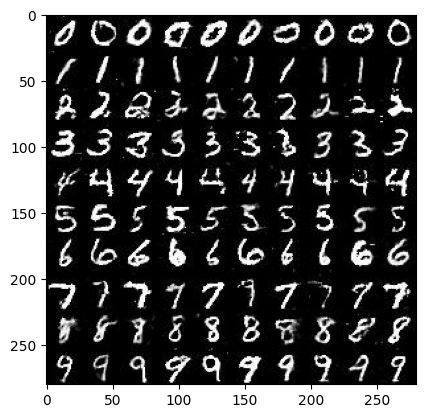

WGAN_GP, penalty = 29.906975624424415


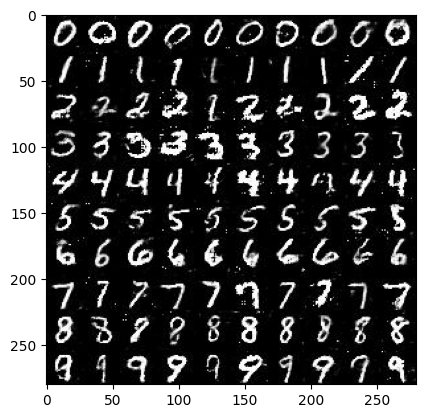

WGAN_GP, penalty = 44.721359549995796


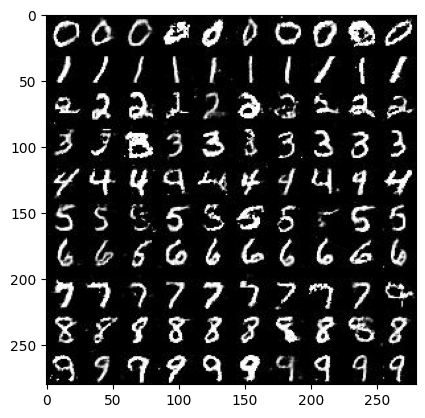

WGAN_GP, penalty = 66.87403049764221


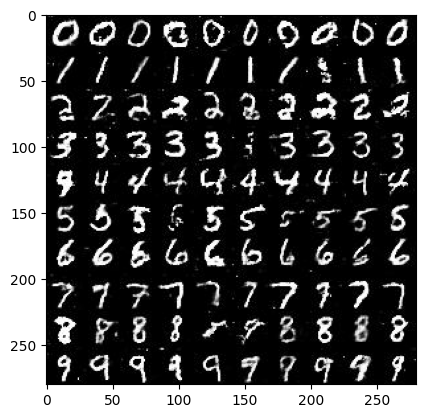

WGAN_GP, penalty = 100.0


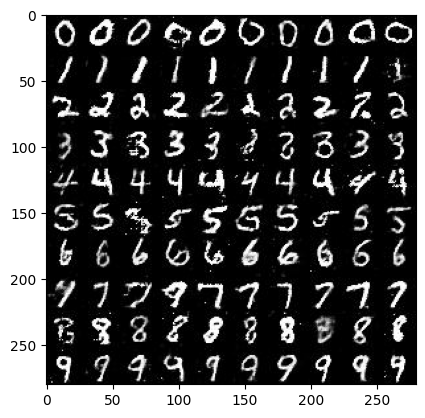

In [9]:
MODEL_NAME = "WGAN_GP"
for penalty in penalties:
  print(f"{MODEL_NAME}, penalty = {penalty}")
  path = f"results/imgs/penalty/{MODEL_NAME}/penalty_{penalty}/{MODEL_NAME}_last.jpg"
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()

# FID SCORE

## WGAN GP

In [12]:
MODEL_NAME = "WGAN_GP"
for penalty in penalties:
  path = f"generated_images/penalty/{MODEL_NAME}/"
  add = "penalty_" + str(penalty)
  path = path + add
  model_path = f"results/models/penalty/{MODEL_NAME}/" + add
  # print(model_path)
  if os.path.exists(path):
      shutil.rmtree(path)
      # print(f"removed {path}")
  os.mkdir(path)
  # print(f"created {path}")

  for digit in range(0,10):
    digit = str(digit)
    Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    

In [13]:
fid_scores = []
for penalty in penalties:
  path = f"generated_images/penalty/{MODEL_NAME}/"
  add = "penalty_" + str(penalty)
  path = path + add
  print(path)
  real_images_path = "real_images"
  generated_images_path = path
  batch_size = 20
  fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
  print(f"FID score: {fid}")
  fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["penalty"] = penalties
fid_df.to_csv(f"results/models/penalty/{MODEL_NAME}_FID_scores_vs_penalty.csv")
fid_df

generated_images/penalty/WGAN_GP/penalty_20.000000000000004
FID score: 93.69823034281296
generated_images/penalty/WGAN_GP/penalty_29.906975624424415
FID score: 78.91044198725925
generated_images/penalty/WGAN_GP/penalty_44.721359549995796
FID score: 74.25035947332441
generated_images/penalty/WGAN_GP/penalty_66.87403049764221
FID score: 77.78094124160606
generated_images/penalty/WGAN_GP/penalty_100.0
FID score: 69.35549355221528


,fid_score,model_name,penalty
0,93.698230,WGAN_GP,20.000000
1,78.910442,WGAN_GP,29.906976
2,74.250359,WGAN_GP,44.721360
3,77.780941,WGAN_GP,66.874030
4,69.355494,WGAN_GP,100.000000


# gradient penalty VS Loss

### WGAN GP


In [14]:
MODEL_NAME = "WGAN_GP"
trained_penalties= os.listdir(f"results/models/penalty/{MODEL_NAME}/")
root = f"results/models/penalty/{MODEL_NAME}/"
G_loss_list = []
D_loss_list = []


for trained_penalty, penalty in zip(trained_penalties, penalties):
  print(penalty)
  path = root + trained_penalty + "/"

  G_loss, D_loss = load_model(path, penalty, n_noise)
  G_loss_list.append(G_loss.item())
  D_loss_list.append(D_loss.item())

  print("D = ",D_loss.item(), "G = ",G_loss.item())


20.000000000000004
D =  0.19452553987503052 G =  -17.63060760498047
29.906975624424415
D =  0.05109919235110283 G =  -4.685884475708008
44.721359549995796
D =  0.2456561177968979 G =  -4.4323554039001465
66.87403049764221
D =  -0.10413827002048492 G =  0.49311310052871704
100.0
D =  0.16356714069843292 G =  -1.3181133270263672


In [15]:
result_loss = pd.DataFrame()
result_loss["D_loss"] = D_loss_list
result_loss["G_loss"] = G_loss_list
result_loss["penalty"] = penalties
result_loss["penalty"] = result_loss["penalty"].astype('str')
result_loss['size'] = 5
result_loss.to_csv(f"results/models/penalty/{MODEL_NAME}_loss_values.csv")
result_loss

,D_loss,G_loss,penalty,size
0,0.194526,-17.630608,20.000000000000004,5
1,0.051099,-4.685884,29.906975624424415,5
2,0.245656,-4.432355,44.721359549995796,5
3,-0.104138,0.493113,66.87403049764221,5
4,0.163567,-1.318113,100.0,5


In [16]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(px.scatter(result_loss, x="penalty", y="D_loss",  size="size").data[0], row=1, col=1)
fig.add_trace(px.scatter(result_loss, x="penalty", y="G_loss",  size="size").data[0], row=1, col=2)
fig.update_layout(title="Loss vs penalty", 
                  xaxis=dict(title="penalty"),
                  yaxis=dict(title="Loss"))

fig.show()

In [17]:
result_time = pd.read_csv(f"results/models/penalty/{MODEL_NAME}_runing_times.csv")
result_time["size"] = 5

In [18]:
fig = px.scatter(result_time, x="penalty", y="time", color="penalty", size="size", title = "run time vs penalty")
fig.show()